# ADS 2017. Homework 1

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02.

(c) There could be some strong linear relationship between $x$ and $y$.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

Answer: (d)

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'<3y$ if b is less than one.

(b) $y'=3y$ in any case.

(c) $y'$ increases by $(2^b-1)*100\%$.

(d) $y'>3y$ if b is bigger than one.

Answer: (a)(d)

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [2]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [4]:
data=pd.DataFrame([list(x),list(y)]).T
data.head()

,0,1
0,0.0,14.0
1,1.0,12.0
2,2.0,18.0
3,3.0,-4.0
4,4.0,14.0


In [5]:
data.columns=["x","y"]
data.head()

,x,y
0,0.0,14.0
1,1.0,12.0
2,2.0,18.0
3,3.0,-4.0
4,4.0,14.0


In [6]:
corr_xy = np.dot((data.x-np.mean(data.x)),(data.y-np.mean(data.y)))/np.sqrt(sum((data.x-np.mean(data.x))**2) * sum((data.y-np.mean(data.y))**2))
print(corr_xy)

0.956301005112


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [7]:
# calculate w1
w1=(np.dot(data.x,data.y)-data.y.sum()*data.x.sum()/len(data))/(np.dot(data.x,data.x)-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 5.28872180451


In [8]:
# calculate w0
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 1.95714285714


In [9]:
sqreR=corr_xy**2
print("R^2 is : {}".format(sqreR))

R^2 is : 0.914511612377


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [10]:
# Performing OLS regression
lm = smf.ols(formula='y ~ x', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 09 Oct 2017   Prob (F-statistic):           4.71e-11
Time:                        11:25:56   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.650      -6.941      10.856
x              5.2887      0.381     13.876      0.000       4.488       6.089
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.245
Skew:                          -0.572   Prob(JB):                        0.537
Kurtosis:                       2.569   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [11]:
data_4=pd.read_csv("Housing_Pluto_Session2.csv")

In [12]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [13]:
# drop all the rows which contain 0
data_4 = data_4[(data_4 != 0).all(1)]

In [14]:
# drop all the rows which contain NaN
data_4 = data_4.dropna(axis=0)

In [15]:
#reseting index 
data_4.reset_index(inplace=True, drop=True) 
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,11201.0,8120,5976000
4,11201.0,1297,56954


#### (b). Visualize the data set.

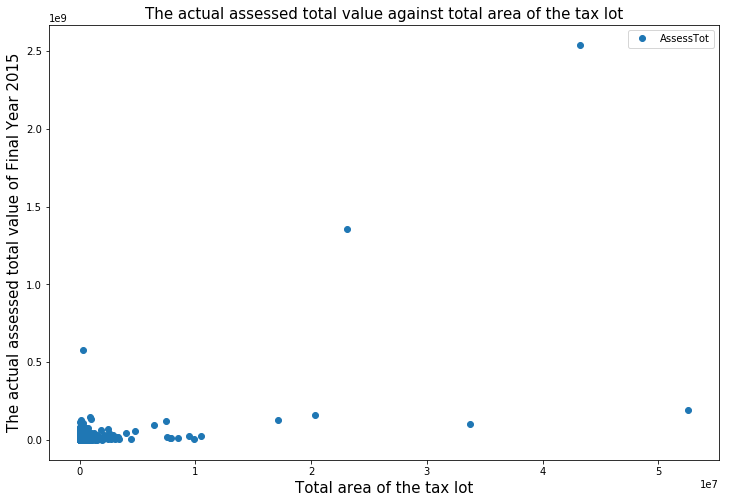

In [16]:
plt.figure(figsize=(12,8))
plt.plot(data_4['LotArea'], data_4['AssessTot'], 'o')
plt.title('The actual assessed total value against total area of the tax lot', fontsize = 15)
plt.xlabel('Total area of the tax lot', fontsize = 15)
plt.ylabel('The actual assessed total value of Final Year 2015', fontsize = 15)
plt.legend()

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [17]:
# Performing OLS regression
lm = smf.ols(formula='data_4.AssessTot ~ data_4.LotArea', data = data_4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       data_4.AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:26:00   Log-Likelihood:            -4.6214e+06
No. Observations:              275942   AIC:                         9.243e+06
Df Residuals:                  275940   BIC:                         9.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.687e+04   8649.652      8.887      0.000    5.99e+04    9.38e+04
data_4.LotArea    21.1603      0.051    415.161      0.000      21.060      21.260
==============================================================================
Omnibus:                  1261795.752   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   60345262637933.125
Skew:                         157.435   Prob(JB):                         0.00
Kurtosis:                   72448.966   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

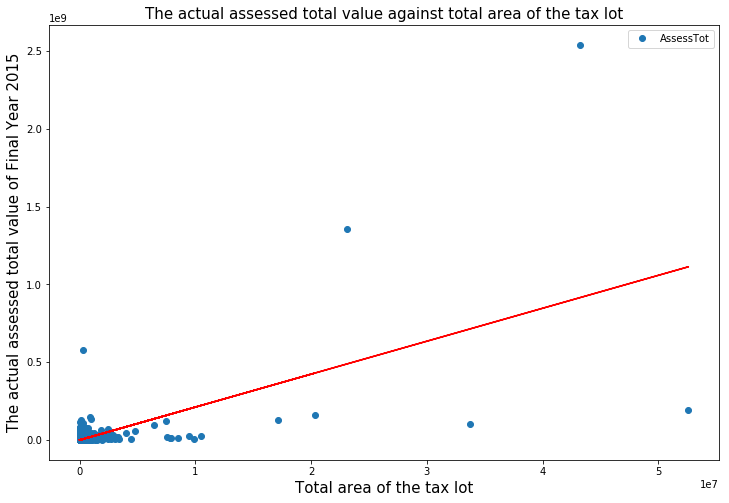

In [18]:
plt.figure(figsize=(12,8))
plt.plot(data_4['LotArea'], data_4['AssessTot'], 'o')
plt.title('The actual assessed total value against total area of the tax lot', fontsize = 15)
plt.xlabel('Total area of the tax lot', fontsize = 15)
plt.ylabel('The actual assessed total value of Final Year 2015', fontsize = 15)
plt.plot(data_4['LotArea'], lm.predict(), '-r')
plt.legend()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [19]:
# Performing OLS regression
lm = smf.ols(formula='data_4.AssessTot ~ data_4.LotArea-1', data = data_4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       data_4.AssessTot   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:26:04   Log-Likelihood:            -4.6214e+06
No. Observations:              275942   AIC:                         9.243e+06
Df Residuals:                  275941   BIC:                         9.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
data_4.LotArea    21.1740      0.051    415.561      0.000      21.074      21.274
==============================================================================
Omnibus:                  1261079.995   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   60228167169597.836
Skew:                         157.128   Prob(JB):                         0.00
Kurtosis:                   72378.645   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

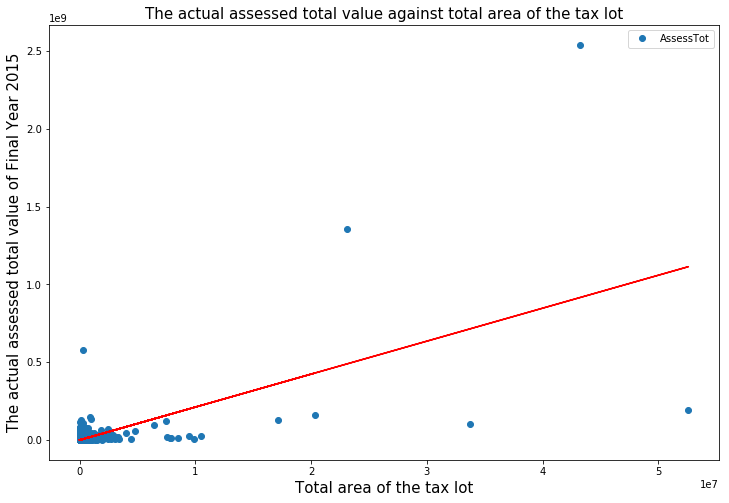

In [20]:
plt.figure(figsize=(12,8))
plt.plot(data_4['LotArea'], data_4['AssessTot'], 'o')
plt.title('The actual assessed total value against total area of the tax lot', fontsize = 15)
plt.xlabel('Total area of the tax lot', fontsize = 15)
plt.ylabel('The actual assessed total value of Final Year 2015', fontsize = 15)
plt.plot(data_4['LotArea'], lm.predict(), '-r')
plt.legend()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [21]:
logArea = np.log(data_4['LotArea'])
logTot = np.log(data_4['AssessTot'])
logdata = pd.DataFrame(data=[logArea, logTot]).T
#logdata.reset_index(inplace=True, drop=True) #reseting index 
logdata.head()

,LotArea,AssessTot
0,11.751745,15.182163
1,10.870471,14.122922
2,9.781320,13.394068
3,9.002085,15.603262
4,7.167809,10.949999


In [22]:
# Performing OLS regression
#lm = smf.ols('AssessTot~ LotArea', data=logdata[logdata.AssessTot>0]).fit()
lm = smf.ols('AssessTot~ LotArea', data=logdata).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AssessTot   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:26:15   Log-Likelihood:            -3.4454e+05
No. Observations:              275942   AIC:                         6.891e+05
Df Residuals:                  275940   BIC:                         6.891e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2088      0.020     10.345      0.000       0.169       0.248
LotArea        1.3250      0.003    515.625      0.000       1.320       1.330
==============================================================================
Omnibus:                    29138.667   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197341.462
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       7.106   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

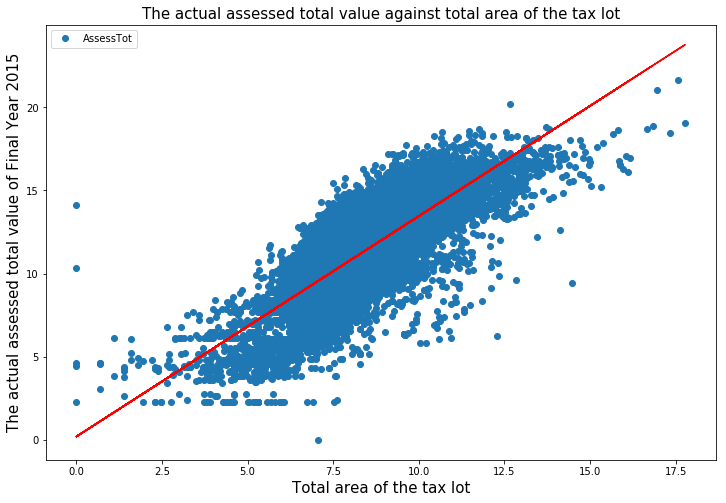

In [23]:
# Visualizing the data
plt.figure(figsize=(12,8))
plt.plot(logdata['LotArea'], logdata['AssessTot'], 'o')
plt.title('The actual assessed total value against total area of the tax lot', fontsize = 15)
plt.xlabel('Total area of the tax lot', fontsize = 15)
plt.ylabel('The actual assessed total value of Final Year 2015', fontsize = 15)
#plt.plot(logdata['LotArea'][logdata.AssessTot>0], lm.predict(), '-r')
plt.plot(logdata['LotArea'], lm.predict(), '-r')
plt.legend()

estimated "$w_1$" means percent changes